# 1.
#### Q: Assume that in every inning a starting pitcher pitches he’s projected to give up 0 runs 60% of the time and 1 run 40% of the time. Assume similarly that a relief pitcher is projected to give up 0 runs 70% of the time and 1 run 30% of the time. Assume the starting pitcher will throw 165 innings and the relief pitcher will throw 50 innings in a season. What are the odds that the starting pitcher gives up less runs on a per-inning basis than the relief pitcher?

Define a random variable X maps an outcome of an inning to {0,1} with 0 representing 0 runs given up, and 1 representing 1 run given up.

For the starter, $ P(X=0) = p_s = .6 $ and $P(X=1) = q_s = .4$

And the reliever, $P(X = 0) = p_r = .7$ and $P(X=1) = q_r = .3$

This situation can be modelled using a simple Monte Carlo simulation. This accounts for variability in probability distributions by generating outcomes based on repeated random samples. In other words, an experiment can be completed thousands of times, each with differing, realistic outcomes.

In this instance, the run per inning outcomes for both pitchers can be determined using the probabilities of conceeding a run for a variable amount of simulations (each of which represent completed seasons).

In [1]:
import random
random.seed(1) # for code reproducibility

probabilities = []
number_iterations =  [10**i for i in range(0,7)]

for iterations in number_iterations:
    
    # define variables
    starting_pitcher_runs = 0
    relief_pitcher_runs = 0

    starting_pitcher_innings = 165
    relief_pitcher_innings = 50

    starter_simulation_wins = 0

    # for each season...
    for i in range(0,iterations):
        # for each starter inning...
        for j in range(0,starting_pitcher_innings): 
            # if given up 0 runs, do nothing
            if random.random() <= 0.6:
                pass 
            # if given up a run, add a run to the total
            else:
                starting_pitcher_runs += 1 
        # for each reliever inning...
        for j in range(0,relief_pitcher_innings):
            # if given up 0 runs, do nothing
            if random.random() <= 0.7:
                pass
            # if given up a run, add a run to the total
            else:
                relief_pitcher_runs += 1

        # divide by total innings to obtain runs per inning
        starting_pitcher_runs/= starting_pitcher_innings
        relief_pitcher_runs /= relief_pitcher_innings

        # akin to comparing after each season, if runs/inning of starter is less, then lower this season. If not, tied or reliever
        # had lower runs/inning
        if( starting_pitcher_runs < relief_pitcher_runs):
            starter_simulation_wins += 1

        #reset for next season
        starting_pitcher_runs = 0
        relief_pitcher_runs = 0

    probability = starter_simulation_wins / iterations
    probabilities.append(probability)
    print(f'The starter had a lower runs per inning in {starter_simulation_wins} simulated seasons, which is {round(probability*100,4)}% of the {iterations} simulation seasons.')


The starter had a lower runs per inning in 1 simulated seasons, which is 100.0% of the 1 simulation seasons.
The starter had a lower runs per inning in 0 simulated seasons, which is 0.0% of the 10 simulation seasons.
The starter had a lower runs per inning in 14 simulated seasons, which is 14.0% of the 100 simulation seasons.
The starter had a lower runs per inning in 97 simulated seasons, which is 9.7% of the 1000 simulation seasons.
The starter had a lower runs per inning in 903 simulated seasons, which is 9.03% of the 10000 simulation seasons.
The starter had a lower runs per inning in 9271 simulated seasons, which is 9.271% of the 100000 simulation seasons.
The starter had a lower runs per inning in 92093 simulated seasons, which is 9.2093% of the 1000000 simulation seasons.


The probability clearly converges to around 9% of the time. This can be visualized further using a plot:

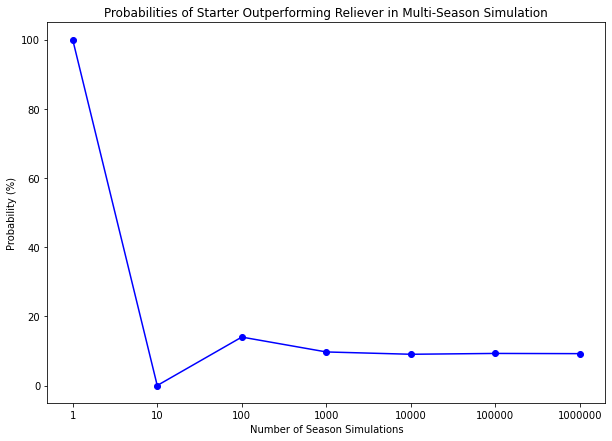

In [2]:
import matplotlib.pyplot as plt
import numpy as np

ticks = [str(10**i) for i in range(0,7)]

plt.figure(figsize =(10,7))
plt.plot(np.array(probabilities)*100,color = 'b',marker = 'o')
plt.title('Probabilities of Starter Outperforming Reliever in Multi-Season Simulation')
plt.xlabel('Number of Season Simulations')
plt.xticks(ticks =np.arange(0,7), labels=ticks)
plt.ylabel('Probability (%)')
plt.show()


# 2. 
#### Q: A pitcher throws 60% of his fastballs in the strike zone. Given that a pitch is in the strike zone, the home plate umpire is known to call a strike 75% of the time, and given a pitch out of the strike zone he is known to call a ball 65% of the time. A fastball from this pitcher in a game with the umpire behind the plate is called a ball. What is the probability that that pitch was in the strike zone?

To find this probability Bayes' Theorem can be utilized. This theorem helps find probabilities given previous information known about conditions related to the event.


$$ P(A| B) = \frac{P(B| A) P(A)}{ P(B | A) P(A) + P(B| A^c) P(A^c)}$$

where,
- $A$ and $B$ are events
- $P(A|B)$ is defined as the probability of A occurring, given B has occurred. 
- $P(B|A)$ is defined as the probability of B occurring, given A has occurred. 
- $A^c$ is the complement of A, 1 - A (probability of A not occurring)


In this case, we can define our events to be:
- $A$: the pitch is in the strike zone
- $B$: the pitch is called a ball

The objective is to solve for the probability that the pitch was in the strike zone, given it's called a ball, or $P(A|B)$.

And the subsequent probabilities that are known:
- $P(A)$: the probability that the pitch is in the strike zone
- $P(A^c)$: the probability that the pitch is out of the strike zone
- $P(B|A)$: the probability that the pitch is called a ball, given it's in the zone.
- $P(B| A^c)$: the probability that the pitch is called a ball, given it's out of the zone.

The values are gathered from the question, and are as follows:

In [3]:
P_A = .6 # pitcher throws 60% of fastballs in the zone
P_Ac = .4 # 1 - P(A)
P_BA = .25 # complement of 75% from question: "Given that a pitch is in the strike zone, the home plate umpire is known to call a strike 75% of the time"
P_BAc = .65 # "and given a pitch out of the strike zone he is known to call a ball 65% of the time"

And to plug into the formula and solve:

In [4]:
P_AB = (P_BA * P_A)/((P_BA * P_A)+(P_BAc*P_Ac))

print(f"The probability of the pitch being in the strike zone given it's called a ball is {round(P_AB,3)*100}%")

The probability of the pitch being in the strike zone given it's called a ball is 36.6%


# 3.

#### A linear regression model with a normal error term is fit to predict ERA as a function of K% (strikeouts per plate appearance) and BB% (walks per plate appearance) for pitchers. The estimated coefficients on the linear model are as follows: 

#### Intercept: 5.81 
#### Slope on K%: -11.7
#### Slope on BB%: 11.4
#### Residual standard error/standard deviation of error on estimates: 1.31

### 3a.

#### What is the probability that a pitcher with a K% of 0.20 and a BB% of 0.10 outperforms a pitcher with a K% of 0.25 and a BB% of 0.20 under this model?

For this example, there are two independent variables (K% and BB%) and one dependent variable (ERA).

The formula for a linear regression model with two features is the linear combination:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon ,$$

where
- $\beta_0$ is the intercept
- $\beta_1$ is the slope of K%
- $\beta_2$ :is the slope of BB%
- $\epsilon$ is the error term.


 $$ ERA prediction = 5.81  -11.7 x_1 + 11.4 x_2 + 1.31$$

Firstly, the ERA projections for the two pitchers can be calculated sans error. 

In [5]:
def predict_ERA(k,bb):
    """
    @returns: ERA projection for given model parameters
    """
    return round(5.81 - 11.7*k + 11.4*bb,2)

In [6]:
k_p1 = .2
bb_p1 = .1
k_p2 = .25
bb_p2 = .2

ERA_1 = predict_ERA(k_p1,bb_p1)
ERA_2 = predict_ERA(k_p2,bb_p2)

print(f'The projection for pitcher 1 is {ERA_1}, while the projection for pitcher 2 is {ERA_2}')

The projection for pitcher 1 is 4.61, while the projection for pitcher 2 is 5.17


Without accounting for the error term, pitcher 1 obviously has a better performance. This should be reflected in the final answer. However, with the given residual std. error, there is great that the better performance changes. The residual std. error represents the standard deviaton of the errors, which in this case, the performances are within a std. dev of each other. For a sanity check, the final answer should favor pitcher 1 only slightly.

Due to the Central Limit Theorem, in linear regression, the error terms are normally distributed.
The key here is that the errors of each projection are independent and since they are independent then: 


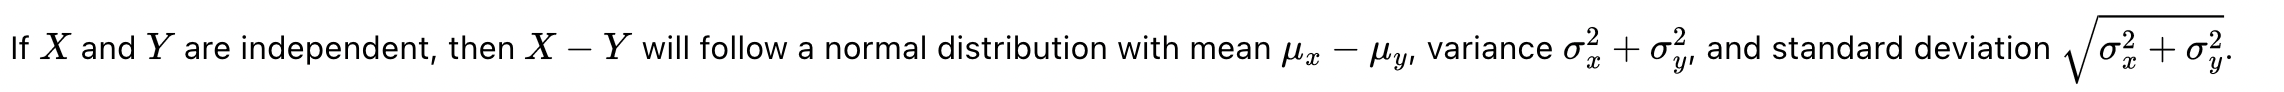

[source](https://online.stat.psu.edu/stat500/book/export/html/572)

Thus, the random variables of the projections can be modelled with 

$\mu_1$ = 4.61

$\mu_2$ = 5.17

$\sigma_1 = \sigma_2 = 1.31 $

Let $Z$ define a new random variable that is normally distributed with $$\mu = 4.61 - 5.17 = -0.56 $$

$$\sigma = \sqrt{1.31^2 + 1.31^2} = 1.853$$ 

Thus, the probability that pitcher 1 outperforms pitcher 2 is whenever the random variable takes on a value $< 0$. This can be found easily with the CDF of the random variable. The CDF, or cumulative distribution function, which measures probability of a normally distributed random variable being less than or equal to a value. Or:
$$F_Z(Z) = \operatorname{P}(Z\leq z)$$

In [7]:
from scipy.stats import norm


mean = -0.56
std_dev = 1.853

# take P(X <= epsilon) such that epsilon is infintesimally smaller than 0. This excludes the probability at 0 (equal performance)
pitcher_one_outperforms = norm.cdf(x =-.0000001, loc = mean, scale = std_dev)

print(f'Based on this linear regression model, the odds that pitcher 1 outperforms pitcher 2 is {round(100*pitcher_one_outperforms,2)}%.')

/Users/Daniel/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Based on this linear regression model, the odds that pitcher 1 outperforms pitcher 2 is 61.88%.


## 3b.
#### If Hit by Pitches per PA were to be added to this model, would you expect the coefficient on BB% to be greater or lower in magnitude? Why?

If HBP/PA were added to the model, the coefficient of BB% would be greater in magnitude in the negative direction. It is important to note just what the coefficient represents; it measures the extent to which walks are detrimental to ERA. When involving additional features that have a coexisting relationship with existing features and with the label, one should expect changes in the existing features. 

Because this relationship exists, one should be careful before needlessly involving redundant features. Before training machine learning models, colinearity should be tested for and avoided. Potential remedies include dropping the more insignificant colinear variable or creating two separate models.  

Colinearity can be defined as the propensity to which two independent, predictor variables have a linear relationship each other. When this occurs, it is impossible to measure what is affecting the dependent variable, and leads to an increased p-value for each coefficient. This signifies decreased statistical significance of the findings.

In this case, when a pitcher is wild and lacks control, both walks and HBP occur more frequently. This relationship is a strong positive correlation, leading to colinearity between these variables, and subsequent changes when both are included. In a linear model, projecting ERA with both of these would render the coefficients of each unreliable, and muddle their effects.

## 3c. 

**On the same data set, a logistic regression model is fit with the dependent variable being 1 if ERA
is less than 4.00 and 0 if ERA is greater than 4.00.
The estimated coefficients on the logistic regression model are as follows:**

Intercept: -2.18

K%: 15.9

BB%: -16.1 

**Is the marginal effect of K% on the probability of having an ERA < 4.00 larger for someone with a K%
of 0.20 and BB% of 0.10 or a pitcher with a K% of 0.25 and BB% of 0.20?**

Firstly, it is important to note what the coefficients in a logistic regression model represent. In these model types, a coefficient, $\beta$, corresponding to a feature, is the expected change in log odds of having the outcome per unit change in X, where X is the feature vector.

It follows, 

$$(p(x)) = \sigma^{-1} (p(x)) = \operatorname{logit} p(x) = \ln \left( \frac{p(x)}{1 - p(x)} \right) = \beta_0 + \beta_1 x$$

from [wikipedia](https://en.wikipedia.org/wiki/Logistic_regression#Definition_of_the_inverse_of_the_logistic_function)


So in this case, since the log odds ratio inverse is the sigmoid function, then the probability given a set of features $X = {x_1, x_2, ...,x_p} $ is,

$$ P(y|X) = \frac{1}{1+e^{-(-2.18 + 15.9 x_1 - 16.1 x_2 )}}$$



Now, we can measure the effect of K% on the probability given the pitchers stats.

In [8]:
import numpy as np

def sigmoid(x):
    return(1/(1 + np.exp(-x)))

In [9]:
b0 = -2.18
b1 = 15.9
b2 = -16.1

k_p1 = .2
bb_p1 = .1
k_p2 = .25
bb_p2 = .2

In [10]:
prob_1 = sigmoid(b0 + b1*k_p1 + b2*bb_p1)
prob_2 = sigmoid(b0 + b1*k_p2 + b2*bb_p2)

print(f'The marginal probability of pitcher 1 having a > 4.00 ERA given his K% and BB% is {round(prob_1,2)*100}%. \
     \nThe marginal probability of pitcher 2 having a > 4.00 ERA given his K% and BB% is {round(prob_2,2)*100}%. ')
print('Therefore, the higher effect of the probability for the pitcher with K% of .20 is larger. ')



The marginal probability of pitcher 1 having a > 4.00 ERA given his K% and BB% is 35.0%.      
The marginal probability of pitcher 2 having a > 4.00 ERA given his K% and BB% is 19.0%. 
Therefore, the higher effect of the probability for the pitcher with K% of .20 is larger. 


## 3d. 
#### If forced to choose between these linear or logistic models based on K% and BB%, which would you prefer to use to determine the quality of a pitcher from only their K% and BB%? Why?


When predicting ERA based on K% and BB%, linear modelling shines as better model type to use. This is not to say that linear modelling provides a 'better' prediction that is more likely to be correct, but rather this due to the inherent properties of each. Linear regression models (and involved coefficient estimators like OLS and penalty estimators Ridge or Lasso regression) are able to predict numerical values.

On the other hand, logistic regression provides a predicition of a discrete outcome given the estimated probability. Discrete, in this case, meaning a variable that is binarized, such as '1 or 0' or 'yes or no'. A logit model classifies the probability as likely (1) or unlikely (0). While this property is useful in some situtions, it should be avoided to oversimplify continuous labels such as ERA. It is because of these fundamental differences that logistic regression is not a valid determination for predicting ERA as good or bad. Going off this example, it is extraordinarily arbitrary to classify a pitcher as good or bad based on a 4.00 ERA cutoff.

Overall, using linear regression based projections for continuous labels provides a more complete view, which more interpretable for non-statisticians. From there, more information and analysis can be gathered to determine a pitcher's disposition.

# 4.

#### Q: Entering the day of September 26, 2022 the New York Mets had a record of 97-57 and the Atlanta Braves were 95-58. In their remaining games, the Mets and Braves were set to play each other in a 3-game series, plus each had 2 other series against other opponents. To that point in the season the Mets’ record against the Braves was 9-7, and if the two teams tied in overall record at the end of the season, whichever team won the season series against each other would win the division. Assume that the Mets’ odds of winning each of their remaining games was 50%. Assume that the Braves’ odds of winning each game against the Mets was 50% and p against all non-Mets opponents. For what value of p would give the Braves a 50% chance of winning the division?

Firstly, outcomes of the Mets-Braves series needs to be calculated. This series ultimately determines the tiebreak - a major factor in determining the division winner. Due to their two game advantage going in, the Mets only need to win 1 game to win the tiebreak.

The outcomes are as follows:
1. Mets sweep: One outcome (MMM) Mets at 100 wins w/ tiebreak
2. Mets win 2 games: Three outcomes (MMB, MBM, BMM) Mets at 99 wins w/ tiebreak
3. Mets win 1 game: Three outcomes (BBM, BMB, MBB) Mets at 98 wins w/ tiebreak
4. Braves sweep: One outcome (BBB) Mets at 97 wins w/o tiebreak

The objective, then, is to find p such that $$P(Braves\ win\ Divison) = f(p) = .5$$ with $p$ being the probability that the Braves win a non-Mets game. Therefore, $1-p$ is the possibility the lose a non-Mets game.

The Mets final win total will be calculated. In other words, the number of ways to win a certain amount of games, over the total possible win/loss patterns.

 The probability for the Mets to win $w$ games for the rest of the year after the 3 Braves games can be found by the function:$$P(X = w) = \frac{\binom{5}{w}}{2^5}$$

In [11]:
import math
import pandas as pd
import numpy as np

met_prob = []
for i in range (0,6):
    met_prob.append(math.comb(5,i)/math.pow(2,5))
a = np.array(met_prob)
a = np.round(a,4)


df = pd.DataFrame(data =a, columns = ['Mets wins by probability'])
df

,Mets wins by probability
0,0.0312
1,0.1562
2,0.3125
3,0.3125
4,0.1562
5,0.0312


Now the Braves probabilities can be added, which are $p$ for winning, and $1-p$ for losing after the Mets series.

In [12]:
braves_prob = []
for i in range(0,6):
    if(i == 0):
        braves_prob.append(f'(p-1)^{str((5-i))}')
    elif(5-i == 0):
        braves_prob.append(f'p^{str(i)} ')
    else:
        braves_prob.append(f'(p^{str(i)} +(p-1)^{str((5-i))})')
    
a = np.array(braves_prob).T
df['Braves wins by probability'] = a
df

,Mets wins by probability,Braves wins by probability
0,0.0312,(p-1)^5
1,0.1562,(p^1 +(p-1)^4)
2,0.3125,(p^2 +(p-1)^3)
3,0.3125,(p^3 +(p-1)^2)
4,0.1562,(p^4 +(p-1)^1)
5,0.0312,p^5


Now the terms can begin to be added to the probability function.

**For outcome 1**, the Mets will have clinched the division, since there is 5 games left with the Braves at 95 wins and without the tiebreak. So for this situation, no term is needed in $f(p)$.

**For outcome 2**, the Mets would be at 99 wins with the Braves at 96 without the tiebreak. With 5 games remaining, the Mets would need to lose either 4 games (100 wins), or all 5 (99 wins). With the Braves needing to win all 5 (101 wins), or 4 or 5 (100,101 wins), respectively. 

These are possible situations that the Braves win, so they are needed to be accounted for in the function. It is important to note that this is granted outcome 2 has occurred. Therefore, any term is needed to be multiplied by the probability of outcome 2, .375 ($\frac{3}{8}$). This is because for independent events $P(A and B) = P(A)*P(B)$.

So after case 2 we have, $$f(p) = .375(M[0]B[4] + M[0]B[5] + M[1]B[5])$$

**For outcome 3**, the Mets would be at 98 wins with the Braves at 97 without the tiebreak. So potential occurances for the Braves to win are (again multiplied by case 3 prob of .375)

$$f(p) = .375(M[0]B[4] + M[0]B[5] + M[1]B[5])+ 
        \\ .375(M[0]B[5]+M[0]B[4] + M[0]B[3] + M[0]B[2] + M[1]B[5]+M[1]B[4]+M[1]B[3] + M[2]B[5]+M[2]B[4] + M[3]B[5])$$
        
**For outcome 4**, Braves at 98 wins with tiebreak, Mets at 97, case 4 has .125 chance of occurring. Now it becomes easier to list the occurrances of the Mets not winning the division (1 - Mets win)
$$f(p) = .375(M[0]B[4] + M[0]B[5] + M[1]B[5])+ 
        \\ .375(M[0]B[5]+M[0]B[4] + M[0]B[3] + M[0]B[2] + M[1]B[5]+M[1]B[4]+M[1]B[3] + M[2]B[5]+M[2]B[4] + M[3]B[5]) + 
        \\ .125(1 - (M[5]B[3] + M[5]B[2] + M[5]B[1] + M[5]B[0] + M[4]B[2] + M[4]B[1] + M[4]B[0] + M[3]B[1] + M[3]B[0] + M[2]B[0]))$$
        
        
        

In [13]:
formula = '.5 = .375(M[0]B[4] + M[0]B[5] + M[1]B[5])+.375(M[0]B[5]+M[0]B[4] + M[0]B[3] + M[0]B[2] + M[1]B[5]+M[1]B[4]+M[1]B[3] + M[2]B[5]+M[2]B[4] + M[3]B[5]) + .125(1 - (M[5]B[3] + M[5]B[2] + M[5]B[1] + M[5]B[0] + M[4]B[2] + M[4]B[1] + M[4]B[0] + M[3]B[1] + M[3]B[0] + M[2]B[0]))'

for i in range(0,6):
    formula = formula.replace(f'M[{i}]', str(df.loc[i,'Mets wins by probability']))
    formula = formula.replace(f'B[{i}]', str(df.loc[i,'Braves wins by probability']))
    
print(formula)

.5 = .375(0.0312(p^4 +(p-1)^1) + 0.0312p^5  + 0.1562p^5 )+.375(0.0312p^5 +0.0312(p^4 +(p-1)^1) + 0.0312(p^3 +(p-1)^2) + 0.0312(p^2 +(p-1)^3) + 0.1562p^5 +0.1562(p^4 +(p-1)^1)+0.1562(p^3 +(p-1)^2) + 0.3125p^5 +0.3125(p^4 +(p-1)^1) + 0.3125p^5 ) + .125(1 - (0.0312(p^3 +(p-1)^2) + 0.0312(p^2 +(p-1)^3) + 0.0312(p^1 +(p-1)^4) + 0.0312(p-1)^5 + 0.1562(p^2 +(p-1)^3) + 0.1562(p^1 +(p-1)^4) + 0.1562(p-1)^5 + 0.3125(p^1 +(p-1)^4) + 0.3125(p-1)^5 + 0.3125(p-1)^5))


Symbolab yields an answer of $92.725$%.

# 5.

Assume that a newly drafted player has WAR/S projections (WAR/S defined as Wins Above
Replacement per Season, where the scale of a Season is defined as 600 Plate Appearances) in each
of his first 12 professional seasons distributed according to a normal distribution with mean and
standard deviation parameters provided below.
Assume that in each season his expected MLB-level playing time is a calculated as a function of his
projection, weighted by the probability of the given projection according to the stated probability
distribution. For a given WAR/S projection, p, the playing time function is:
$$𝑃𝑙𝑎𝑦𝑖𝑛𝑔 𝑇𝑖𝑚𝑒 (𝑃𝐴)
= {0, 𝑖𝑓 𝑝 ≤ 0
600 ∙ (\frac{p}
{2}) , 𝑖𝑓 0 < 𝑝 ≤ 2
600, 𝑖𝑓 𝑝 > 2$$
**What is this player’s total expected MLB-level playing time over the 7-year period where the
projected cumulative playing time is at a maximum?**


For each season, the expected WAR can be calculated using the given mean projections and standard deviations.

Expected value of a random variable X (in this case, the normal distribution each year...) is 
$${E}[X] =x_1p_1 + x_2p_2 + \cdots + x_kp_k$$

where $x_1$ is the value of the random variable at case 1 and $p_1$ is the probability of that even occurring. It follows that the total EV can be found by finding these probabilities with the events mapped in the PA function. These probabilities can be found using the CDF, or cumulative distribution function, which measures probability of a normally distributed random variable X being less than or equal to a value. Or:


$$F_X(x) = \operatorname{P}(X\leq x)$$

It follows that the difference of two cdf values yields their compound inequality:

$$\operatorname{P}(a < X \le b)= F_X(b) - F_X(a)$$

In [14]:
# first, define the given means and std devs
means = [-2.6,-1.5,-.5,.2,.8,1.4,1.5,1.4,1.2,0.9,0.5,-.1]
std_devs = [.2,.7,1,1.3,1.5,1.7,1.9,2.1,2.3,2.4,2.6,2.8]

The following code generates the cdf values for the bounds of the given piecewise function. For each component of the domain, the probability is calculated that $F_X(x) = \operatorname{P}(X\leq value)$.

For the middle interval of the domain, the exact value corresponding to the given probabilities are needed to plug into the function ($\frac{p}{2}*600$). For this , the stats.ppf function is used. This inverses the cdf for the given probability to find the associated value that is $\pm \sigma$ from the mean.

In [15]:
from scipy.stats import norm

expected_playing_time = []
for i in range(0,12):

    # for each mean/std dev pair...
    mean = means[i]
    std_dev = std_devs[i]
    
    # find the relavent probs for given intervals
    prob_less_than_eq_zero = norm.cdf(x = 0,loc = mean, scale = std_dev)
    prob_less_than_eq_two = norm.cdf(x = 2,loc = mean, scale = std_dev)
    prob_less_than_eq_two_and_greater_than_zero = prob_less_than_eq_two-prob_less_than_eq_zero  
    prob_greater_than_two = 1 - prob_less_than_eq_two    
    
    # find p for 0 <= x < 2 interval
    p = norm.ppf(prob_less_than_eq_zero+ prob_less_than_eq_two_and_greater_than_zero,loc = mean, scale = std_dev)
 

    #ignores pesky, handled warning from invalid value yielded by CDF below for season 1 playing time estimate
    import warnings
    warnings.filterwarnings('ignore')
    
    # plug into EV formula
    ev = 0*prob_less_than_eq_zero + \
           600*(p/2)*prob_less_than_eq_two_and_greater_than_zero + \
            600*prob_greater_than_two

    # if inverse of cdf is nonexistent, no probability on middle interval - playing time...thus replace by 0
    if(np.isnan(ev)):
        ev = 0

    expected_playing_time.append(ev)
    print(f'The EV for season {i+1} is {ev:.2f} plate appearances.')

The EV for season 1 is 0.00 plate appearances.
The EV for season 2 is 9.64 plate appearances.
The EV for season 3 is 185.12 plate appearances.
The EV for season 4 is 336.68 plate appearances.
The EV for season 5 is 421.86 plate appearances.
The EV for season 6 is 476.94 plate appearances.
The EV for season 7 is 471.05 plate appearances.
The EV for season 8 is 448.50 plate appearances.
The EV for season 9 is 419.44 plate appearances.
The EV for season 10 is 387.70 plate appearances.
The EV for season 11 is 345.75 plate appearances.
The EV for season 12 is 291.45 plate appearances.


Now, the highest 7 year running sum is calculated for the given expected values.

In [16]:
highest_running_sum = 0 

# for each season
for i in range(0,12):
    counter = 0
    sevenyear_sum = 0
    # sum up EV's until either 7 years passes, or reach the end of player's career
    while(counter < 7 and counter + i < 11):
        sevenyear_sum+=expected_playing_time[counter+i]
        counter+=1
        # if the total is higher than previous highest, replace 
        if(sevenyear_sum >highest_running_sum):
            highest_running_sum = sevenyear_sum

print(f'The highest 7 year sum of expected plate appearances for this player is {highest_running_sum:.2f}.')

The highest 7 year sum of expected plate appearances for this player is 2971.25.


# 6.

#### Given the following information, describe how you would construct a model to predict the likelihood of a flyball out on a flyball to the outfield: 

- Identities of all players on field (fielders, pitcher, batter, runners)
- game state (number of outs,runners on base, inning, score)
- temperature
- crowd size
- batted ball launch characteristics (exit velocity, launch angle, spray angle, hang time)
- outfielder fielding percentage
- stadium characteristics (fence distance and height)
- day/night game
- pitcher/batter historical matchup results
- initial fielder positioning data

Provided with this information, there are many potential paths forward to predict the outcome of a flyball to the outfield. Before any modelling occurs, it is important to select which features are most relevant for this problem. This helps to determine which model types would be the most useful, as well as helps to reduce noise, or unwanted behaviors by the models. 

In this instance, there are some extraneous features that would have no effect on the outcome of the play. Namely, `crowd size` and `pitcher/batter historical matchup results` are two of these. The former has on effect on any in-game plays (ignoring the rare 'fan interference'), while the latter would only impact decisions made prior to the beginning of the play, like whether to pinch hit or to rest an everyday starter. In this case, since the play has already begun, this data is irrelevant to the problem at hand. Similarly, `identities of all players on field` is superfluous; when the ball is already in the air, the only relevant player is the fielder. The relevant characteristics of the fielder are already accounted for with the `outfielder fielding percentage` and `initial fielder positioning data` features. 

Similarly, the features included in `game state` can be ignored for this problem. These factors are inherently accounted for by `initial fielder positioning` (0 outs man on 3rd => shallow fielders).

Moreover, `day/night game` can be disregarded in favor of features of other atmospheric conditions. Factors like `wind speed`, ` atmospheric pressure`, and `temperature` (already included) are more specific and tangible than a day or night game.  

So, when moving forward, these features mentioned above should be recategorized into different headers.

- ~~Identities of all players on field (fielders, pitcher, batter, runners)~~
- ~~game state (number of outs,runners on base, inning, score)~~
- 'weather' effects
    - wind speed
    - temperature
    - atmospheric temperature
- ~~crowd size~~
- batted ball launch characteristics
    - exit velocity
    - launch angle
    - spray angle
    - hang time
- fielder data
    - outfielder fielding percentage
    - intial fielder positioning data
- stadium characteristics
    - fence height
    - fence distance

Finally, the modeling can be done. In this instance, the most intuitive model to use is a logistic regression model. As previously mentioned in question 3c, the prediction represents the encoded probability that a set of features yields a 0 (a caught ball) or 1 (a hit). This is inherently useful for this problem. 

However, this can cause problems with using such a large number of labels, like multicolinearity. Therefore, more simplification can be done. Just for one example, using simple calculus, one can find the distance a ball can travel given speed and launch angle. This can be cross referenced with the fielder positioning to invent a `fielder distance from landing spot` feature, also with the fencing to determine home runs and ground rule doubles. These examples can be expunged before moving forward with a logit model.

Another idea involves using a scaled version of the `batted ball characteristics` for use in k-neighbors classifier (given labelled data) or k-means clustering (given unlabeled). These would organize these statistics into groups based on previous datapoints (i.e. if a ball has similar stats as 1000 previously labelled hits, then it is likely a hit). 

These are just a few of the ways that modeling can predict an out/hit on a flyball to the outfield.  


# 7. 

#### Q: The Brewers are considering signing one of two different infielders to 4-year guaranteed contracts with WAR/S projections and salaries in the following table:

#### Assuming you had to pick one of these two deals, which player would you recommend the Brewers sign. Note: there are no forfeited draft picks or any other compensation required for the contracts. Please explain your process and any assumptions you make. Please limit your answer to 300 words.

In [17]:
import pandas as pd

data = {'2023':[ 1.1 ,1.0 ,3.1, 10.0],'2024':[1.7 ,3.0, 2.4, 10.0],'2025':[1.5, 7.0, 1.6, 10.0],'2026':[1.2, 10.0, 0.7, 10.0]}
df = pd.DataFrame.from_dict(data, orient = 'index',columns = ['playerAwar','playerAsal','playerBwar','playerBsal'])
df

,playerAwar,playerAsal,playerBwar,playerBsal
2023,1.1,1.0,3.1,10.0
2024,1.7,3.0,2.4,10.0
2025,1.5,7.0,1.6,10.0
2026,1.2,10.0,0.7,10.0


Firstly, the most important calculation to be made from this data is salary per WAR.

In [18]:
df.loc['Total'] = df.sum()
df

,playerAwar,playerAsal,playerBwar,playerBsal
2023,1.1,1.0,3.1,10.0
2024,1.7,3.0,2.4,10.0
2025,1.5,7.0,1.6,10.0
2026,1.2,10.0,0.7,10.0
Total,5.5,21.0,7.8,40.0


In [19]:
sal_per_war_A = df.loc['Total','playerAsal']/df.loc['Total','playerAwar']
sal_per_war_B = df.loc['Total','playerBsal']/df.loc['Total','playerBwar']

print(f'The $/WAR of player A is ${round(sal_per_war_A,2)} mil, while the $/WAR of player B is ${round(sal_per_war_B,2)} mil')

The $/WAR of player A is $3.82 mil, while the $/WAR of player B is $5.13 mil


From these figures it is easy to gather that player A is a better deal in terms of price and performance than player B. From Fangraphs, the average spent per war is ~$8.5 million. These contracts both are significantly lower than that average value.

There are fundamental, baseball-driven questions that undoubtedly influence this decision as well. The most important of these is the Brewers' aspirations for the years of player B's most heavy monetary commitment. Just how valuable are the added wins granted by player B in 2023 and 2024? On a team that has World Series aspirations, these added wins could be the difference between winning the central division and a bye or merely a berth in the wild card. So despite player A's team friendly deal over the four years, in certain years it is of the utmost importance to maximize output at each position. In this case, player B would be a better fit. 

Additionally, the concept of positional scarcity has a large impact on WAR. It differs greatly for a player based on performance compared to his peers at the same position only. For example, the shortstop and catcher positions yield higher WAR than 1st basemen for equal performance, due to a wider gap between high and low production players. This has a drastic impact on the decision. For example, in 2022, a first baseman with 2.8 oWAR was Matt Olsen, who triple slashed .240/.325/.477 with 34 HR and 103 RBI. Willson Contrareas, a catcher, had 3.7 oWAR with only 22 HR, 55 RBI and a similar slash of .243/.349/.466.

In modern baseball, players are deemed to be more valuable if they are able to play more than one position at a high level. Where as in previous generations, a separate 'utility player' was often rostered, now even stars are proficient at multiple places in the field. This corresponds with the increasingly positionless game that has developed. Even with the incoming ban of extreme shifts, it is an incredible advantage to have these versatile players, and this should be accounted for in free agent negotiations.

Lastly, it is important to note the increase in free agent contract values and overall salaries around the league. With the increase of average contract length and value in the 2022 free agency class thus far, the total contract value difference between player A and B simply might not be as significant as in previous eras.

In summation, while both deals are steals by 2022 FA metrics, player A's contract is a better option strictly speaking in terms of dollar value. However, there are numerous factors that might make player B a better option for the Brewers to sign.

# 8.

#### In 2022, two minor leagues used an automated ball-strike (ABS) challenge system, in which the umpire calls balls and strikes, but the pitcher, catcher, and batter may challenge the call. Each team is allocated three challenges per game with successful challenges retained. If this system were to be implemented in the majors in 2024, how should teams adjust their team building and gameplay strategies to prepare? Please limit your answer to 300 words.

The implementation of an automated ball-strike system introduces numerous changes in strategy in the MLB. 

In the article [Bring on Robo-umps?](https://www.bu.edu/articles/2019/mlb-umpires-strike-zone-accuracy/) by Boston University, systematic analysis of 2018 umpiring data shows that 'two-strike bias' is alive and well. This is defined by the likelihood of umpires to call batters out for the third strike on pitchers that were outside the strike zone. Therefore, an adjustment of strategy if robo-umps were included (even in a challenge system only) is to slightly weigh batters higher who have a history of accurate eyes even on 2 strike counts. Players like this who come to mind are historic walkers like Joey Votto, Brandon Nimmo, and Juan Soto. These players who really control the strike zone are in line to be rewarded by the abolishment of the bias of umpires to call batters out looking. 

Similarly as a long-time fan, I have often noticed that umpires seemingly give a pitcher a lot of leeway on 3-0 counts. Similarly to the two strike bias, if this similar bias is removed, then it only stands to favor pitchers who can command the strike zone. Obviously control should be an important factor anyway, but these circumstances should only magnify the importance that control has on overall pitcher analysis.

Another recommendation is to prepare for the introduction  of ABS is to simply prepare for the possibility of replay review becoming a bigger aspect of the game. One way to do this is to 'beef up' replay coordination departments, employ more video staff, and have a standardized hierarchy of communication with the manager being at the top. Teams are obviously more prepared for this development in the game now that a challenge system exists, but with the increase in potential to determine games, this should be of the utmost importance.